# Exploratory Data Analysis

<b>Load Data</b>

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("../datasets/data_pre_processing.csv")
df.sample(5)

,corpus_name,raw_sentence,clean_sentence_training,label,clean_sentence_EDA
3468,measuring hate speech,"White guys with guns have been running the show for a long time. 243 years to be exact & look where we're at. Imagine if we banned men from owning guns. All men. Suicides, homicides & mass shooting deaths would immediately & significantly decrease. Imagine that. @shannonrwatts",White running show long time year exact look Imagine banned owning Suicides homicide mass shooting death would immediately significantly decrease,non-risky,White running show long time year exact look Imagine banned owning Suicides homicide mass shooting death would immediately significantly decrease
34874,measuring hate speech,@Onision Dare you to walk into a crowd of black people and say that. I'll bet anything they won't feel the same way you do.,Dare walk crowd black people anything feel,potentially-risky,Dare walk crowd black people anything feel
4987,measuring hate speech,Tattle Boad Ur Gay and you gave me Ebola,Tattle Boad gave Ebola,non-risky,Tattle Boad gave Ebola
92075,twitter sentiment analysis,@user tragic. #wolves,tragic wolf,risky,tragic wolf
25599,measuring hate speech,"Ah. I'm probably Brown. ""Brown"" people enjoy simple life and it's good friends and close relationships what makes them happy.",probably Brown people enjoy simple life good friend close relationship make happy,non-risky,probably Brown people enjoy simple life good friend close relationship make happy


In [2]:
df.shape

(93878, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93878 entries, 0 to 93877
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   corpus_name              93878 non-null  object
 1   raw_sentence             93878 non-null  object
 2   clean_sentence_training  93487 non-null  object
 3   label                    93878 non-null  object
 4   clean_sentence_EDA       93487 non-null  object
dtypes: object(5)
memory usage: 3.6+ MB


<b>Check Missing Value</b>

In [4]:
# percentage
((df.isna().sum()/df.shape[0])*100).round(2)

corpus_name                0.00
raw_sentence               0.00
clean_sentence_training    0.42
label                      0.00
clean_sentence_EDA         0.42
dtype: float64

In [5]:
# total
df.isna().sum()

corpus_name                  0
raw_sentence                 0
clean_sentence_training    391
label                        0
clean_sentence_EDA         391
dtype: int64

In [6]:
df.columns

Index(['corpus_name', 'raw_sentence', 'clean_sentence_training', 'label',
       'clean_sentence_EDA'],
      dtype='object')

In [7]:
df.dtypes

corpus_name                object
raw_sentence               object
clean_sentence_training    object
label                      object
clean_sentence_EDA         object
dtype: object

<b>Number of Characters</b>

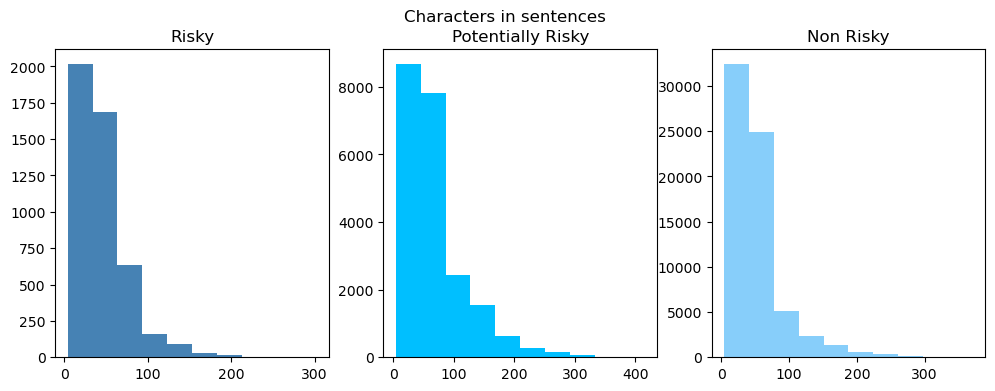

In [8]:
import matplotlib.pyplot as plt

fig,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(12,4))

dfca_len=df[df['label']=='risky']['clean_sentence_EDA'].str.len()
ax1.hist(dfca_len,color='steelblue')
ax1.set_title('Risky')

dfcb_len=df[df['label']=='potentially-risky']['clean_sentence_EDA'].str.len()
ax2.hist(dfcb_len,color='deepskyblue')
ax2.set_title('Potentially Risky')

dfcc_len=df[df['label']=='non-risky']['clean_sentence_EDA'].str.len()
ax3.hist(dfcc_len,color='lightskyblue')
ax3.set_title('Non Risky')

fig.suptitle('Characters in sentences')
plt.show()

<b>Number of Words</b>

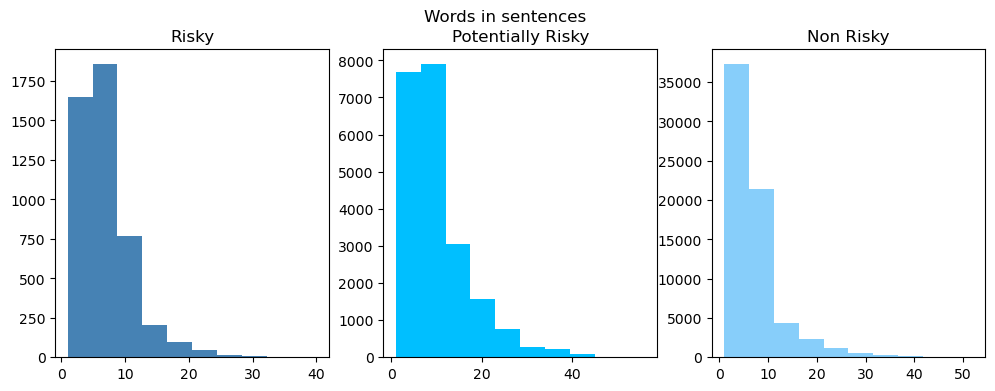

In [9]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,4))

dfwa_len=df[df['label']=='risky']['clean_sentence_EDA'].str.split().map(lambda x: len(x))
ax1.hist(dfwa_len,color='steelblue')
ax1.set_title('Risky')

dfwb_len=df[df['label']=='potentially-risky']['clean_sentence_EDA'].str.split().map(lambda x: len(x))
ax2.hist(dfwb_len,color='deepskyblue')
ax2.set_title('Potentially Risky')

dfwc_len=df[df['label']=='non-risky']['clean_sentence_EDA'].apply(str).str.split().map(lambda x: len(x))
ax3.hist(dfwc_len,color='lightskyblue')
ax3.set_title('Non Risky')

fig.suptitle('Words in sentences')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 0.98, 'Average word length in each sentence')

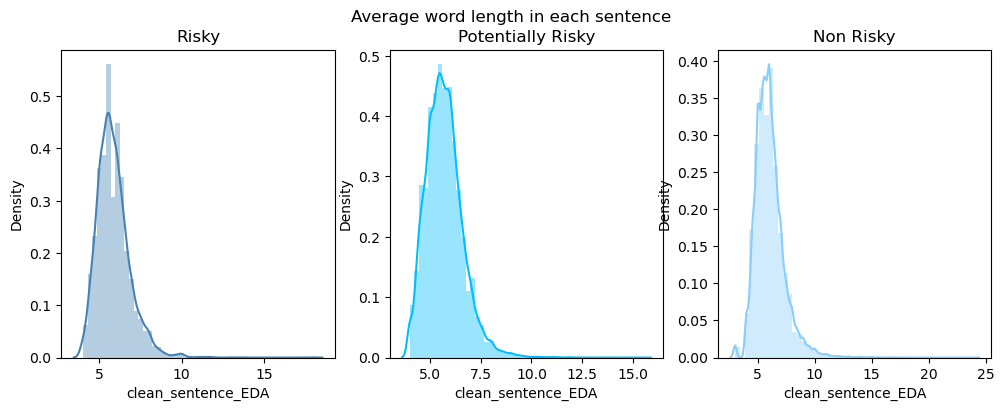

In [10]:
import seaborn as sns
import numpy as np

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,4))

wordaa=df[df['label']=='risky']['clean_sentence_EDA'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordaa.map(lambda x: np.mean(x)),ax=ax1,color='steelblue')
ax1.set_title('Risky')

wordab=df[df['label']=='potentially-risky']['clean_sentence_EDA'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordab.map(lambda x: np.mean(x)),ax=ax2,color='deepskyblue')
ax2.set_title('Potentially Risky')

wordac=df[df['label']=='non-risky']['clean_sentence_EDA'].apply(str).str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordac.map(lambda x: np.mean(x)),ax=ax3,color='lightskyblue')
ax3.set_title('Non Risky')

fig.suptitle('Average word length in each sentence')

<b>Analyzing Top Words</b>

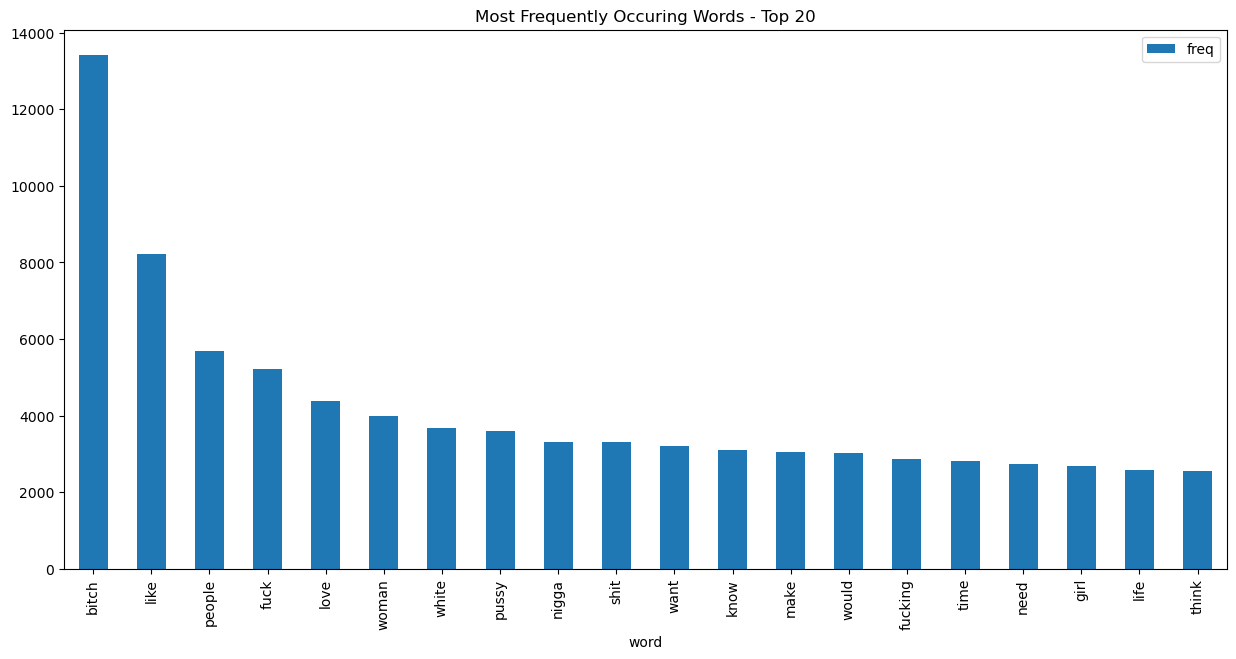

In [11]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
words = cv.fit_transform(df.clean_sentence_EDA.values.astype('U'))

sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7))
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

In [12]:
frequency.head(20)

,word,freq
0,bitch,13407
1,like,8207
2,people,5695
3,fuck,5209
4,love,4375
5,woman,4000
6,white,3668
7,pussy,3600
8,nigga,3317
9,shit,3297


<b>Wordclouds</b>

In [13]:
from wordcloud import WordCloud 


words = ' '.join([Text for Text in words_df[words_df['vader_word_label']==1]['word']])
wordCloud = WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(words)
plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Vader Wordcloud Positive")
plt.show()

NameError: name 'words_df' is not defined

In [ ]:
from wordcloud import WordCloud 

words = ' '.join([Text for Text in df[df['label']=='non-risky']['clean_sentence_EDA'].values.astype('U')])
wordCloud = WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(words)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Wordcloud Non-Risky")
plt.show()

In [ ]:
from wordcloud import WordCloud 

words = ' '.join([Text for Text in df[df['label']=='potentially-risky']['clean_sentence_EDA'].values.astype('U')])
wordCloud = WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(words)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Wordcloud Potentially-Risky")
plt.show()

In [ ]:
from wordcloud import WordCloud 

words = ' '.join([Text for Text in df[df['label']=='risky']['clean_sentence_EDA'].values.astype('U')])
wordCloud = WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(words)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Wordcloud Risky")
plt.show()

In [ ]:
import nltk

nltk_tokens = nltk.word_tokenize(str(df['clean_sentence_EDA']))

list(nltk.bigrams(nltk_tokens))

In [ ]:
import nltk

nltk_tokens = nltk.word_tokenize(str(df['clean_sentence_EDA']))

list(nltk.trigrams(nltk_tokens))